<a href="https://colab.research.google.com/github/ctruciosm/BasicStats/blob/main/Intro_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução ao uso de R para análise de dados

### 1.1 Instalando R no computador

- Instalar R [Windows](https://cran.r-project.org/bin/windows/base/), [Outros SO](https://cran.r-project.org/).
- Usuários Windows devem também instalar Rtools [Link](https://cran.r-project.org/bin/windows/Rtools/)
- Instalar Rstudio [Link](https://www.rstudio.com/products/rstudio/download/) (escolher RStudio Desktop **Free**)
- Uma vez que tenha tudo instalado, recomendo assistir o seguinte [video](https://www.youtube.com/watch?v=5SMJsKamuSQ&list=PLrqJCLOY0EkDc3zIhA0-Lk-M12FnReWwa&index=2&t=3130s)

### 1.2 R na nuvem

- Rstudio cloud (precisa criar uma conta)  [Link](https://rstudio.cloud/)
- Google Colab [https://colab.to/r](https://colab.to/r) (precisa ter conta gmail)

# 2. Importando dados

- Para poder analisar dados precisamos primeiros importar (trazer os dados ao R). 
- Existem diversas formas, sendo a mais fácil a função `read.csv()` para importar arquivos em formato csv ou `read.table()` para importar dados em formato txt.
- Se quiser saber como importar dados do excel, leia este post [aqui](https://ctruciosm.github.io/posts/2021-12-01-r-como-importar-dados-do-excel/)

### 2.1 Hands-on

- Dados dos passageiros do Titanic estão disponívensi no seguinte [Link](https://raw.githubusercontent.com/ctruciosm/ctruciosm.github.io/master/datasets/titanic.csv)
- Fazermos uma análise exploratoria de dados (EDA) de algums das variáveis contidas no _data set_.
- EDA consiste em construir Tabelas, Gráficos e estatísticas resumos que nos ajudarão a ter um maior panorama dos dados.


In [2]:
# Importando dados com a função read.csv()

## Salvamos, entre aspas, o url onde está o conjunto de dados.
url = "https://raw.githubusercontent.com/ctruciosm/ctruciosm.github.io/master/datasets/titanic.csv" 
### Caso os dados estejam em um arquivo local no computador, basta colocar o endereço:
### Por exemplo: "/Users/Carlos/UFRJ/MAD211/datasets/titanic.csv"

## Importamos os dados
dados_titanic = read.csv(url)

## Vemos as primeiras observações
head(dados_titanic)

,X,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,892,0,3rd,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,2,893,1,3rd,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,3,894,0,2nd,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,4,895,0,3rd,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,5,896,1,3rd,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,6,897,0,3rd,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


# 3. Analisando variáveis Qualitativas

Algumas variáveis categóricas (ou qualitativas) são: 

- Survived (1 se a pessoa sobreviveu e 0 se não sobreviveu).
- PClass (classe da passagem: primeira, segunda, terceira).
- Sex (sexo)


In [14]:
## Frequencia Absolutas
table(dados_titanic$Sex)
### Repare que a sintaxe é nome_do_dataset$nome_da_variavel


female   male 
   466    843 

In [5]:
## Frequencia Relativa
prop.table(table(dados_titanic$Sex))


   female      male 
0.3559969 0.6440031 

In [6]:
## Frequencia Percentual
prop.table(table(dados_titanic$Sex))*100


  female     male 
35.59969 64.40031 

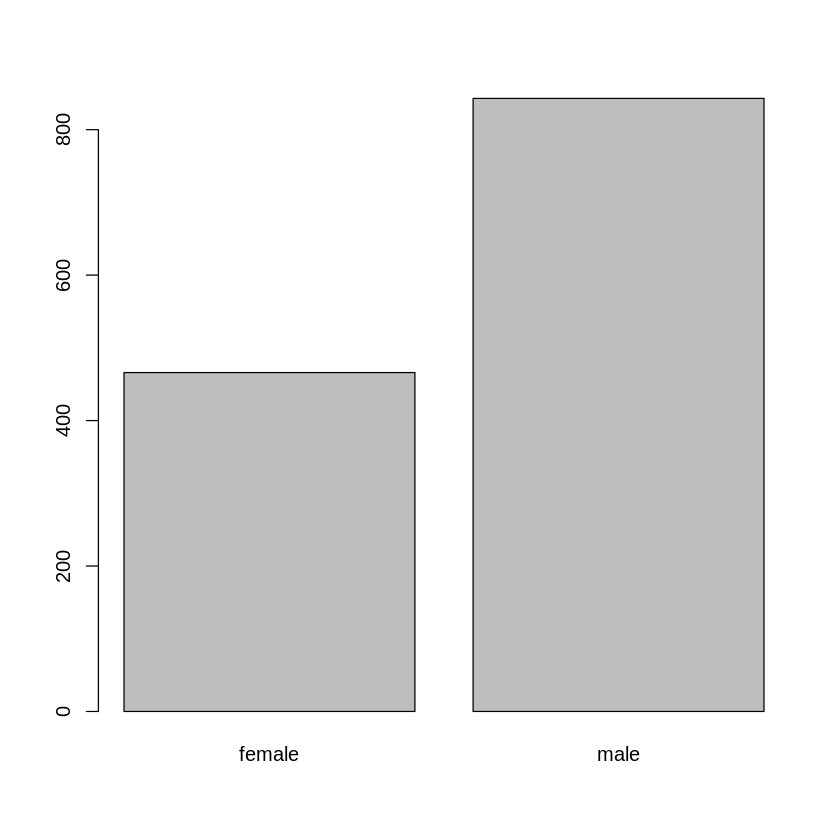

In [15]:
## Gráfico de Barras
barplot(table(dados_titanic$Sex))

A função `tab1()` (tab um) do pacote `EpiDisplay` nos ajuda a fazer essa tabela de forma rápida.

- R está cheio de pacotes
- Precisamos instalar o pacote (uma única vez)
- Precisamos carregar o pacote (sempre que formos utilizar)

In [9]:
# Para instalar pacotes utilizamos a função 
# install.packages("Entre_aspas_o_nome_do_Pacote")
install.packages("epiDisplay")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
# Carregar pacotes
library(epiDisplay)

Loading required package: foreign

Loading required package: survival

Loading required package: MASS

Loading required package: nnet



,Frequency,Percent,Cum. percent
female,466,35.6,35.6
male,843,64.4,100.0
Total,1309,100.0,100.0


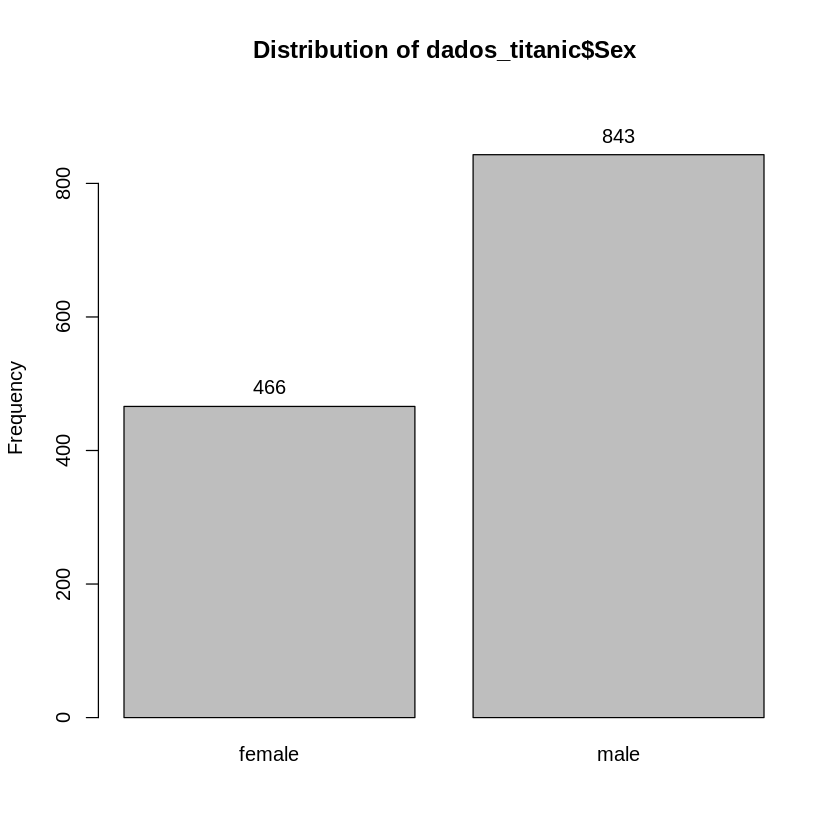

In [16]:
# Tabela de Frequencias
epiDisplay::tab1(dados_titanic$Sex)

In [18]:
# Quando conhecemos o nome de uma função mas não sabemos como ela funciona, podemos pedir ajuda ao R atraves do comando
?tab1
# ou
help(tab1)

# 4. Analisando variáveis Quantitativas

Algumas variáveis numéricas (quantitativas) são:

- Age (idade do passageiro)
- Fare (preço do ticket)

> **Obs:** Embora `PassengerId` e `Ticket`sejam números, repare que **não são** variáveis quantitativas, são apenas identificadores (semelhando com o que acontece com o CPF, são números mas não faz sentido somar CPFs).

algumas funções úteis para resumir variáveis quantitativas são:

- `mean(x)` (média)
- `median(x)` (mediana)
- `quantile(x, prob = k/100)` (para calcular o percentil k -- $P_k$)
- `max(x)`(máximo)
- `min(x)` (mínimo)
- `var(x)`(variância)
- `sd(x)` (desvio padrão)
- `IQR(x)` (amplitude interquartil)
- `cor(x,y)` (correlação entre `x`e `y`)
- `cov(x,y)` (covariância entre `x`e `y`)

> **Obs**: Se tivermos dados faltantes (NAs) cada uma dessas funções retornará o valor de NA sempre. Para evitar isso, basta fazer, por exemplo: `mean(x, na.rm = TRUE)`


### 4.1 Hands-On:

In [19]:
mean(dados_titanic$Age)

[1] NA

In [20]:
mean(dados_titanic$Age, na.rm = TRUE)

[1] 29.88114

In [21]:
median(dados_titanic$Age, na.rm = TRUE)

[1] 28

In [23]:
quantile(dados_titanic$Age, prob = 25/100, na.rm = TRUE)

25% 
 21

In [24]:
quantile(dados_titanic$Age, prob = c(0.25, 0.5, 0.75, 0.9), na.rm = TRUE)

25% 50% 75% 90% 
 21  28  39  50

In [25]:
max(dados_titanic$Age, na.rm = TRUE)

[1] 80

In [26]:
min(dados_titanic$Age, na.rm = TRUE)

[1] 0.17

In [27]:
var(dados_titanic$Age, na.rm = TRUE)

[1] 207.7488

In [28]:
sd(dados_titanic$Age, na.rm = TRUE)

[1] 14.41349

In [29]:
IQR(dados_titanic$Age, na.rm = TRUE)

[1] 18

In [34]:
cor(dados_titanic$Age, dados_titanic$Fare)

[1] NA

In [35]:
cor(dados_titanic$Age, dados_titanic$Fare, use = "complete.obs")

[1] 0.1787399

In [36]:
cov(dados_titanic$Age, dados_titanic$Fare, use = "complete.obs")

[1] 143.3398

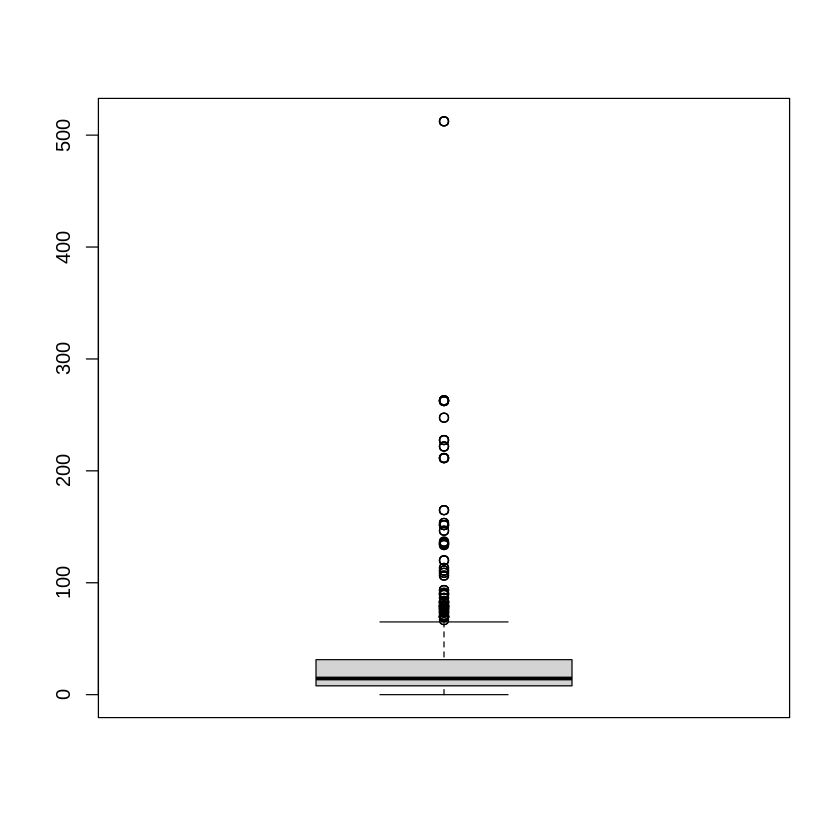

In [38]:
boxplot(dados_titanic$Fare)

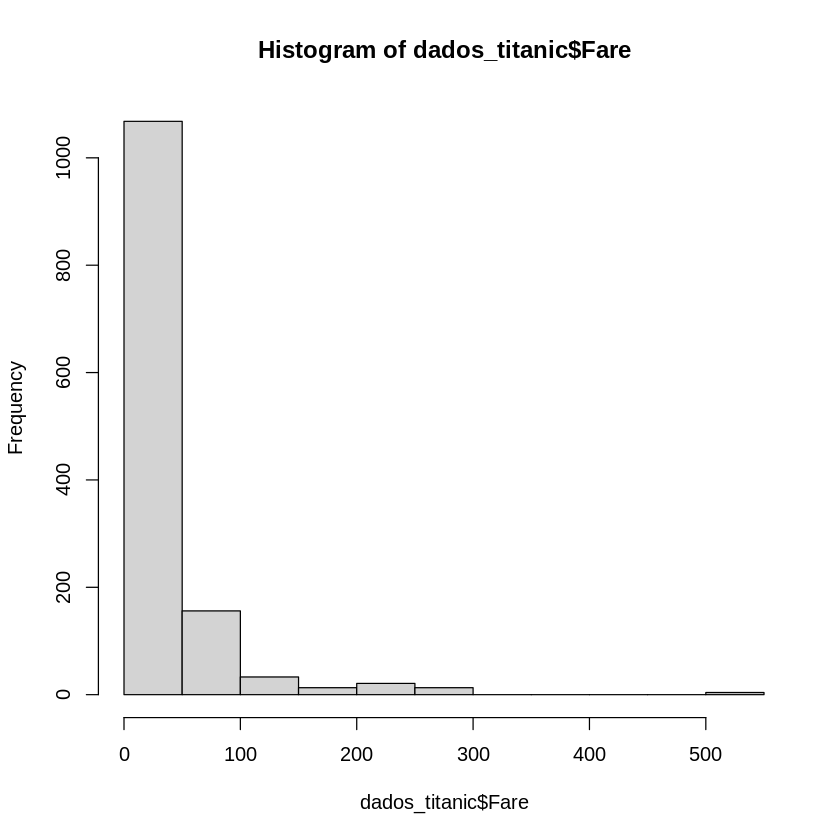

In [39]:
hist(dados_titanic$Fare)

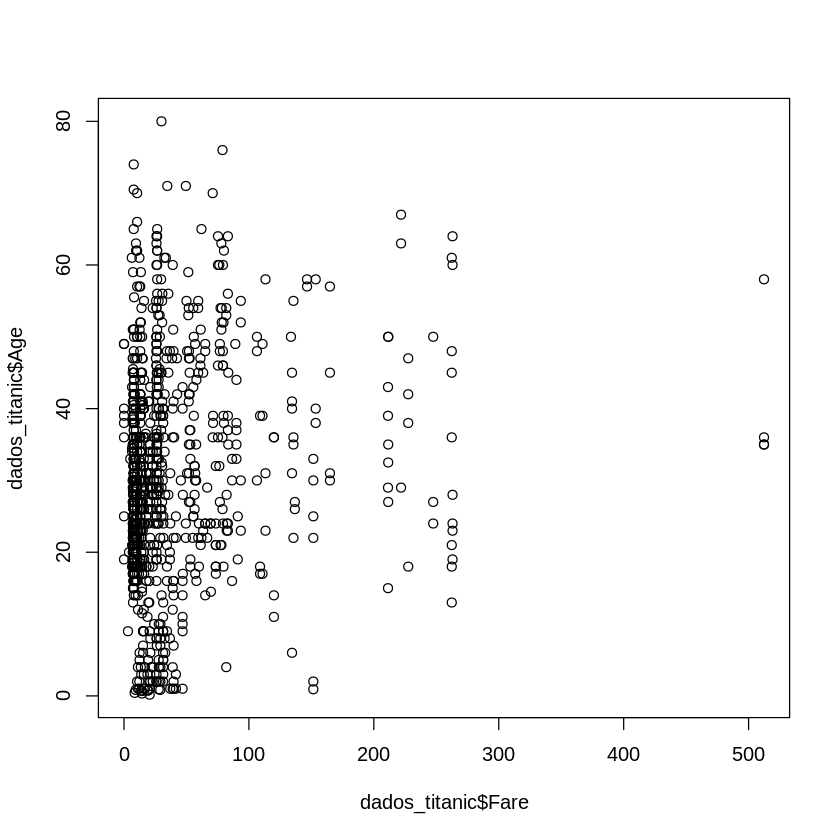

In [40]:
plot(dados_titanic$Fare, dados_titanic$Age)

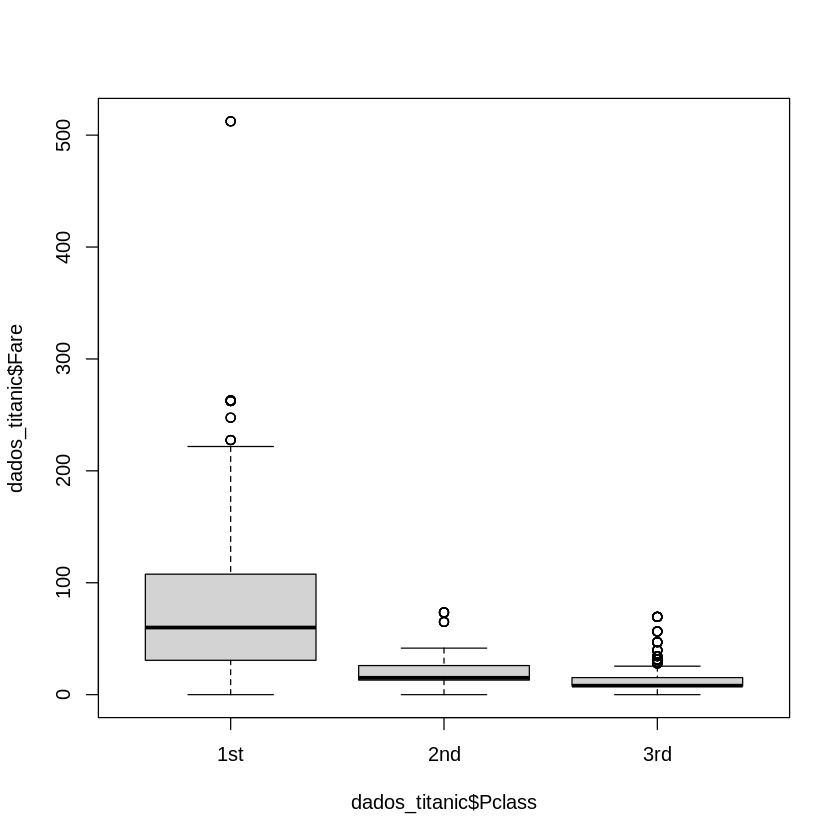

In [42]:
boxplot(dados_titanic$Fare ~ dados_titanic$Pclass)

> **Obs:** Gráficos muitos mais bonitos e elegantes podem ser obtidos utilizando o pacote `ggplot2`. Caso tenha interesse em conhecer um pouco mais deste pacote, veja o seguinte [video](https://www.youtube.com/watch?v=Smz5fP06A-k). 